## Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load & Explore data

In [2]:
data = pd.read_csv('D:\Projects\MeriSkill\project 1\Sales Data.csv')
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [3]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [4]:
data.info()
data.shape
data.duplicated().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
 9   Hour              185950 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 14.2+ MB


264

In [5]:
data.describe() 

,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [6]:
data.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object

In [7]:
data[['Order Date', 'Order Time']] = data['Order Date'].str.split(' ', expand = True)
data[['Order Date', 'Order Time']].head()

,Order Date,Order Time
0,2019-12-30,00:01:00
1,2019-12-29,07:03:00
2,2019-12-12,18:21:00
3,2019-12-22,15:13:00
4,2019-12-18,12:38:00


In [8]:
data['Order Time'] = data['Order Time'].str.replace(':00', '')
data['Order Time'].head()

0    00:01
1    07:03
2    18:21
3    15:13
4    12:38
Name: Order Time, dtype: object

In [9]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Order Time
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,00:01
1,295666,LG Washing Machine,1,600.00,2019-12-29,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,07:03
2,295667,USB-C Charging Cable,1,11.95,2019-12-12,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,18:21
3,295668,27in FHD Monitor,1,149.99,2019-12-22,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,15:13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,12:38


In [10]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

data['City'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Order Time
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,00:01
1,295666,LG Washing Machine,1,600.00,2019-12-29,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,07:03
2,295667,USB-C Charging Cable,1,11.95,2019-12-12,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,18:21
3,295668,27in FHD Monitor,1,149.99,2019-12-22,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,15:13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,12:38


In [11]:
data=data[['Order ID', 'Order Date', 'Month', 'Order Time', 'Hour', 'Product', 'Quantity Ordered', 'Price Each', 'Sales', 'Purchase Address', 'City']]
data.head()

,Order ID,Order Date,Month,Order Time,Hour,Product,Quantity Ordered,Price Each,Sales,Purchase Address,City
0,295665,2019-12-30,12,00:01,0,Macbook Pro Laptop,1,1700.00,1700.00,"136 Church St, New York City, NY 10001",New York City (NY)
1,295666,2019-12-29,12,07:03,7,LG Washing Machine,1,600.00,600.00,"562 2nd St, New York City, NY 10001",New York City (NY)
2,295667,2019-12-12,12,18:21,18,USB-C Charging Cable,1,11.95,11.95,"277 Main St, New York City, NY 10001",New York City (NY)
3,295668,2019-12-22,12,15:13,15,27in FHD Monitor,1,149.99,149.99,"410 6th St, San Francisco, CA 94016",San Francisco (CA)
4,295669,2019-12-18,12,12:38,12,USB-C Charging Cable,1,11.95,11.95,"43 Hill St, Atlanta, GA 30301",Atlanta (GA)


## Exploratory Analysis

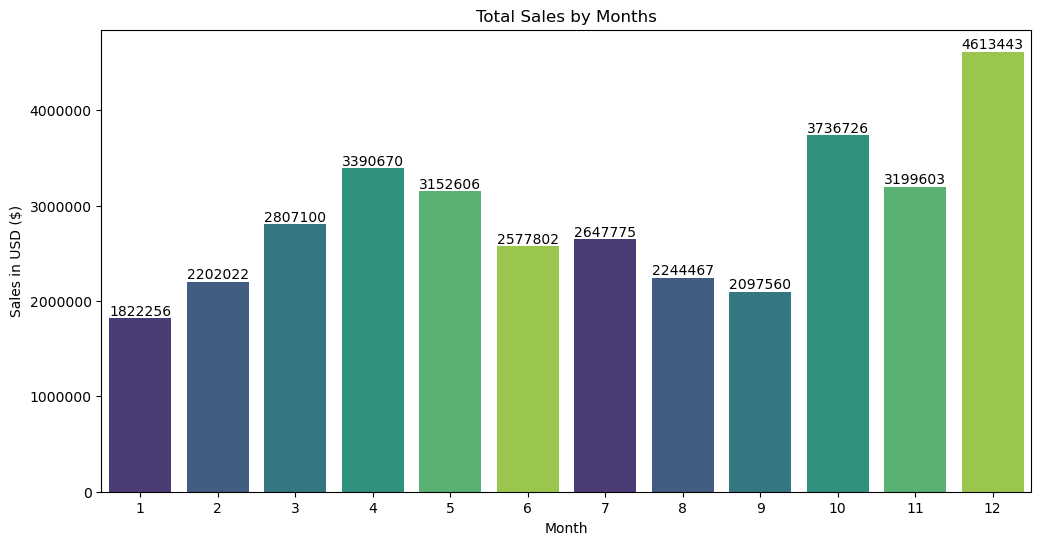

In [12]:
total_sales_per_month = data.groupby('Month')['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=total_sales_per_month, x='Month', y='Sales',palette=sns.color_palette('viridis'))
plt.xlabel('Month')
plt.ylabel('Sales in USD ($)')
plt.title('Total Sales by Months')
plt.ticklabel_format(style='plain', axis='y')
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

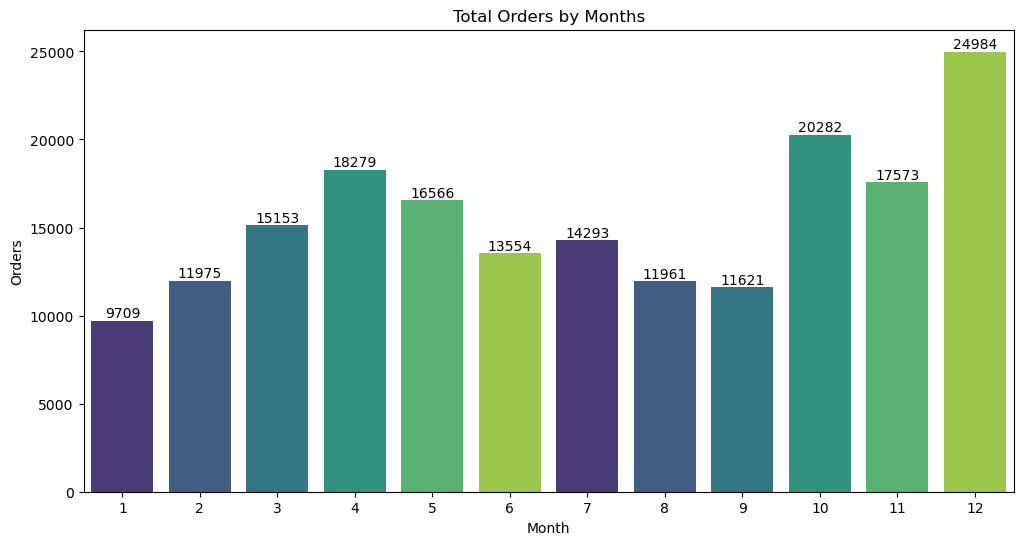

In [13]:
plt.figure(figsize=(12, 6))
sales_counts = data['Month'].value_counts().sort_index()
ax=sns.countplot(data=data, x='Month', palette=sns.color_palette('viridis'))
ax.set_xlabel('Month')
ax.set_ylabel('Orders')
ax.set_title('Total Orders by Months')
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

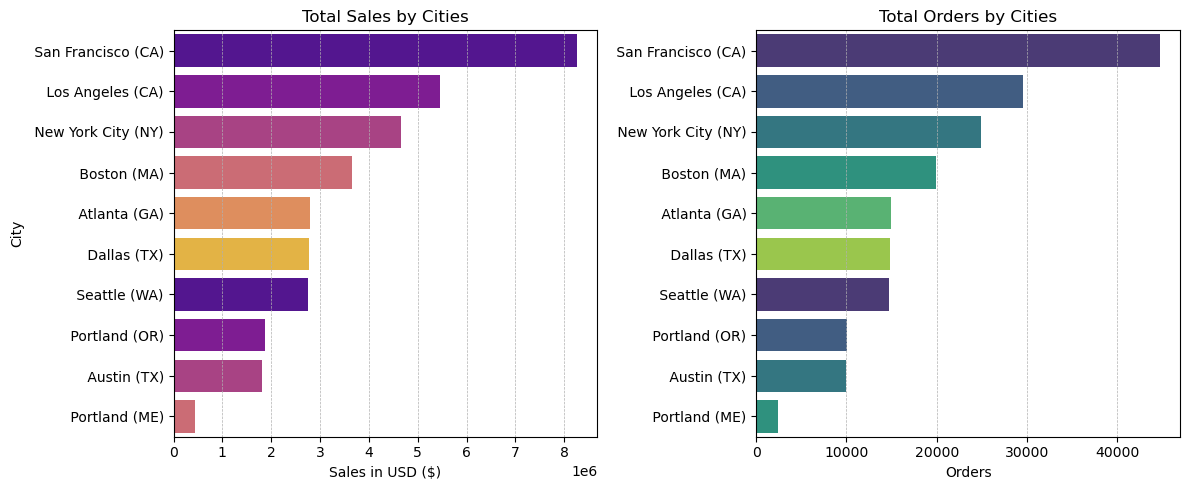

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

total_sales_per_city = data.groupby('City')['Sales'].sum().reset_index()
total_sales_per_city = total_sales_per_city.sort_values(by='Sales',ascending=False)
sns.barplot(x='Sales', y='City', data=total_sales_per_city, palette=sns.color_palette('plasma'),ax=ax[0])
ax[0].set_xlabel('Sales in USD ($)')
ax[0].set_ylabel('City')
ax[0].set_title('Total Sales by Cities')
ax[0].grid(axis='x', linestyle='--', linewidth=0.5)


total_orders_per_city = data.groupby('City')['Sales'].count().reset_index()
total_orders_per_city = total_orders_per_city.sort_values(by='Sales', ascending=False) 
sns.barplot(x='Sales', y='City', data=total_orders_per_city, palette= sns.color_palette('viridis'),ax=ax[1])
ax[1].set_xlabel('Orders')
ax[1].set_ylabel('')
ax[1].set_title('Total Orders by Cities')
ax[1].grid(axis='x', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

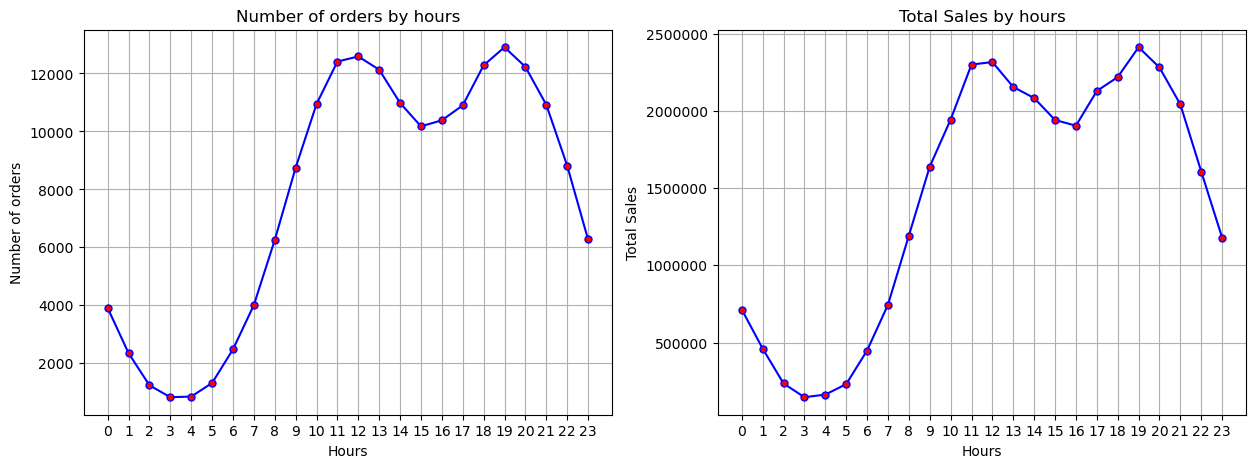

In [15]:
hourly_orders = data.groupby('Hour')['Order ID'].count()
hourly_sales = data.groupby('Hour')['Sales'].sum()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(hourly_orders.index, hourly_orders.values, marker='o', color='blue', markerfacecolor='red', markersize=5)
ax[0].set_xlabel('Hours')
ax[0].set_ylabel('Number of orders')
ax[0].set_xticks(hourly_orders.index)
ax[0].set_title('Number of orders by hours')
ax[0].grid()

ax[1].plot(hourly_sales.index, hourly_sales.values, marker='o', color='blue', markerfacecolor='red', markersize=5)
ax[1].set_xlabel('Hours')
ax[1].set_ylabel('Total Sales')
ax[1].set_xticks(hourly_sales.index)
ax[1].set_title('Total Sales by hours')
ax[1].ticklabel_format(style='plain')
ax[1].grid()

plt.show()

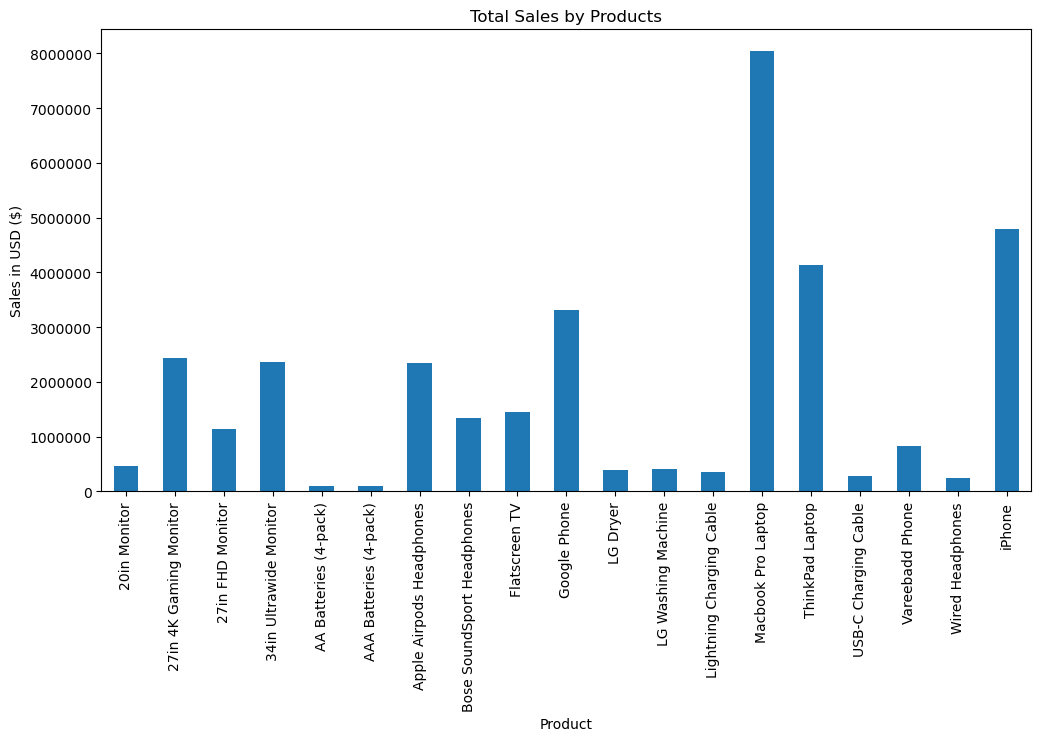

In [16]:
product_sales = data.groupby('Product')['Sales'].sum()
plt.figure(figsize=(12, 6))  
product_sales.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Sales in USD ($)')
plt.title('Total Sales by Products')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

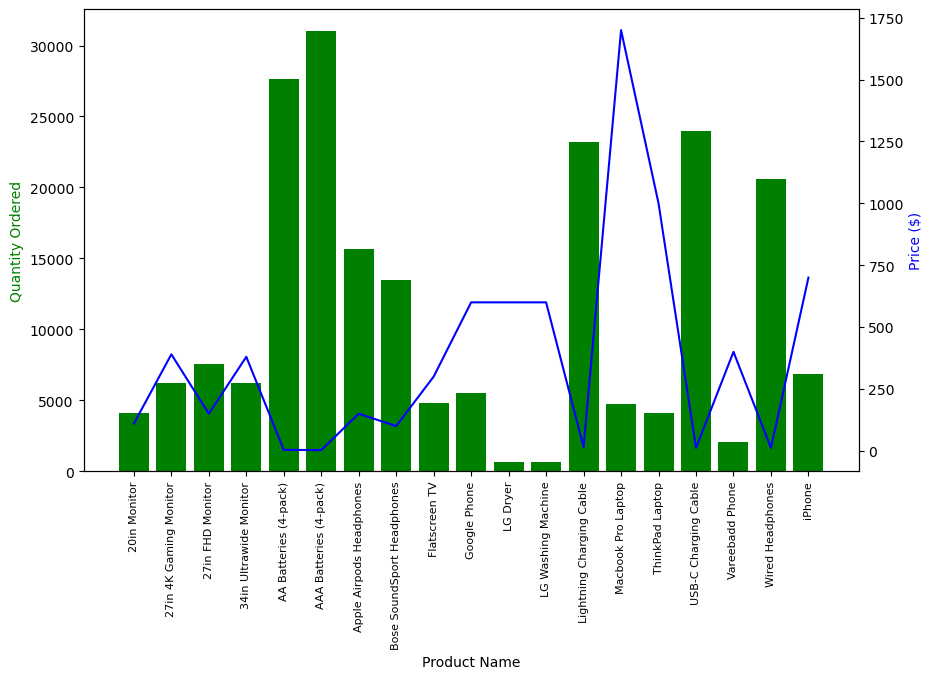

In [17]:
product_group = data.groupby('Product')
quantity_orderd = product_group.sum()['Quantity Ordered']
prices = data.groupby('Product').mean()['Price Each']
products = [Product for Product, data in product_group]

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
ax1.bar(products, quantity_orderd, color='g')
ax2.plot(products, prices, color='b')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()

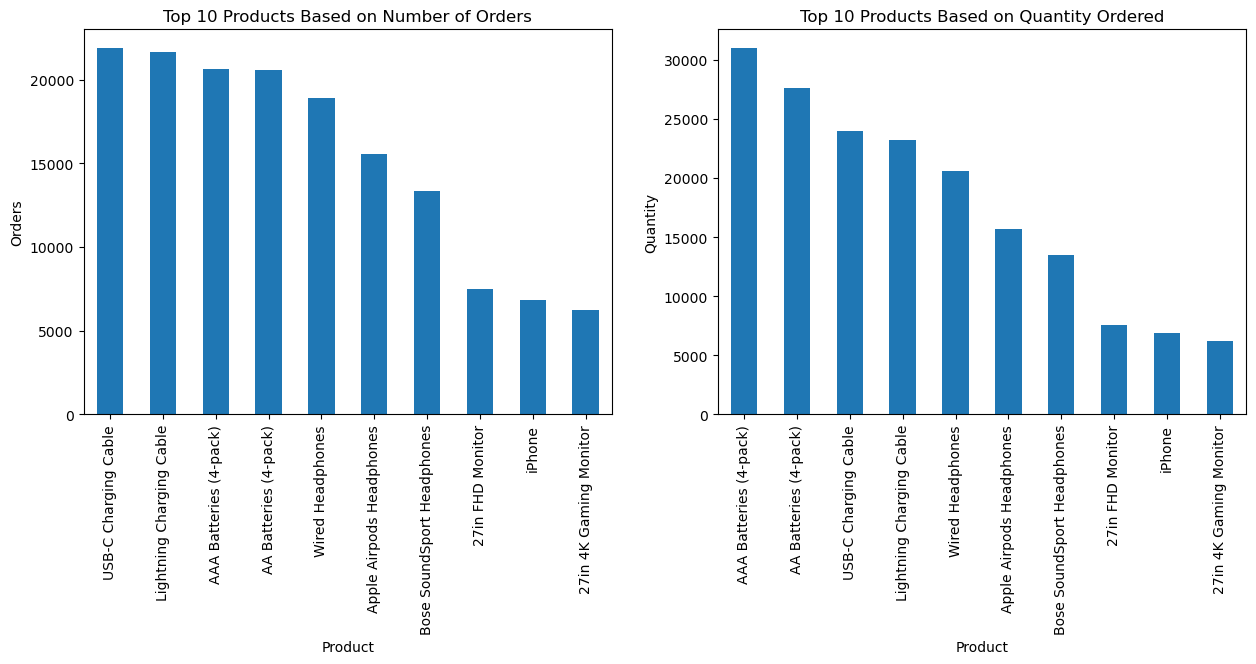

In [18]:
product_orders = data.groupby('Product')['Order ID'].count()
top_products = product_orders.nlargest(10)
product_qty = data.groupby('Product')['Quantity Ordered'].sum()
top_qty_products = product_qty.nlargest(10)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

top_products.plot(kind='bar',ax=ax[0])
ax[0].set_xlabel('Product')
ax[0].set_ylabel('Orders')
ax[0].set_title('Top 10 Products Based on Number of Orders')



top_qty_products.plot(kind='bar',ax=ax[1])
ax[1].set_xlabel('Product')
ax[1].set_ylabel('Quantity')
ax[1].set_title('Top 10 Products Based on Quantity Ordered')

plt.show()

## Coorelation Matrix

In [19]:
corr = data.corr()

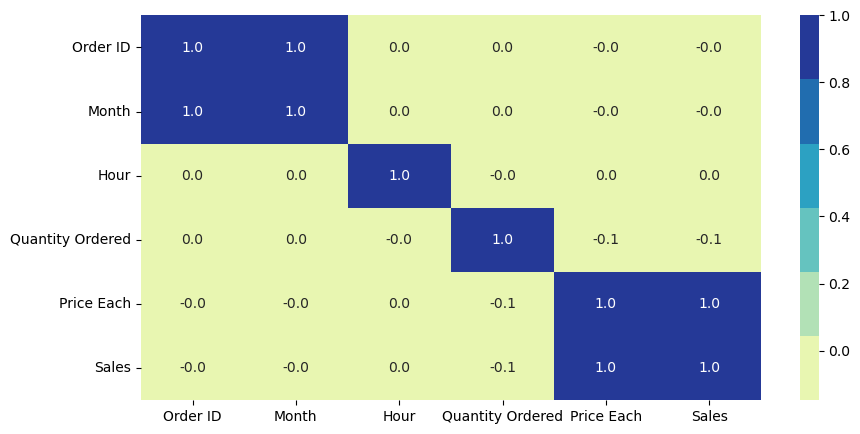

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True ,fmt='.1f', cmap=(sns.color_palette('YlGnBu')))
plt.show()